# Foundations of Data Science
## Homework 5: Algorithmic fairness

Student Name: Tekuri Sai Akhil

Student Id: st5050

***

### Part 1: Algorithmic fairness (15 points)


#### Data acquisition and preparation (5 points)

For this question we will use the "Adult.data" dataset from the UC Irvine repository.

This data is from the United States census, and we will examine the algorithmic fairness for an income prediction task. For more information about the dataset, see [Here](https://archive.ics.uci.edu/ml/datasets/adult).


1\. Download the data. (1 point)

Load data from the URL using the pandas read_csv method.

In [1]:
#Place code here
import numpy as np
import pandas as pd

# import data from csv
df = pd.read_csv("adult/adult.data", header=None)

2\. If the column headers are not correct, assign names to them (hint: use the readme from the source website). Compute descriptive statistics for the education level. (2 points).

In [2]:
#Place code here

# Add column names
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

print("Descriptive statistics for the education level")
print(df["education"].describe(include='object'))


print("\nDescriptive statistics for the education number")
print(df["education-num"].describe())

Descriptive statistics for the education level
count        32561
unique          16
top        HS-grad
freq         10501
Name: education, dtype: object

Descriptive statistics for the education number
count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64


3\. Select one attribute as protected. Explain the reason why you selected this attribute. (1 point)

Protected attributes require the prefix protected. The outcome attribute requires the prefix target. For example, if you need to measure fairness rankings of a dataset with the columns sex and credit_score, rename the columns to protected_sex and target_credit_Score. Update the column names for our dataset (hint: you may also have to convert the target to a binary variable and create dummy variables for those that are categorical, for upcoming steps). (1 point).

In [3]:
# choose and rename protected feature and target feature
df.rename(columns={'sex':'protected_sex','income':"target_income" }, inplace=True)
df['target_income'] = np.where(df['target_income'].astype('string') == " <=50K", 0,1)

# dummy variables for categorical features
cate_encoded = pd.get_dummies(df[['protected_sex','workclass','education','marital-status','occupation','relationship','native-country','race']])
df = df.drop(['protected_sex','workclass','education','marital-status','occupation','relationship','native-country','race'],axis=1)
df = pd.concat([df, cate_encoded], axis = 1)

print("I've selected attribute 'sex' as the protected attribute, because amoung all the attributes I think attribute 'sex' may cause/induce algorithemic bias and i want to verify that")

I've selected attribute 'sex' as the protected attribute, because amoung all the attributes I think attribute 'sex' may cause/induce algorithemic bias and i want to verify that


#### Build a Classifier (5 points)

4\. Select a type of classifier to build for the income prediction task. Give reasoning for why you picked this type. (1 point)

$\color{blue}{\text{ Place your answer here.}}$

1. I've picked DecisionTreeClassifier for this prediction task because it is easy to interpret and we don't need to do any feature selection.

5\. Split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn. (1 point)


In [4]:
#Place code here
n = df.shape[0]

np.random.seed(42)

# generate 20% test indexes
test_index = []
while len(test_index) < 0.2*n:
    new_index = np.random.randint(0,n)
    if new_index not in test_index:
        test_index.append(new_index)

# Split train(80%) and test(20%)
train_df = df[~df.index.isin(test_index)]
test_df = df[df.index.isin(test_index)]


X_train, Y_train = train_df.drop(['target_income'],axis=1), train_df['target_income']
X_test, Y_test = test_df.drop(['target_income'],axis=1), test_df['target_income']

6\. On the training set, implement your classifier. Give reasoning for your choice of any hyperparameter(s). (1 point)

In [5]:
#Place code here

# Implement DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=4,random_state=42).fit(X_train,Y_train)
print("I've set max_depth = 4 to avoid overfitting")

I've set max_depth = 4 to avoid overfitting


7\. To demonstrate the performance of your classifier, we will now plot the AUROC. Below are two functions which you can use. What you need to add is code to plot the AUROC for all the data and as well for each value of the protected attribute (on one set of axes). (2 points)

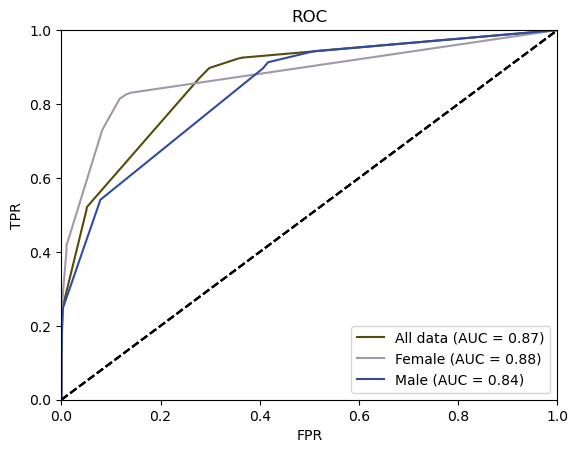

In [6]:
#Code for computing the AUCROC

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

def getAUC(truth, pred):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    return auc(fpr, tpr)


def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

#Add code below to subset rows by protected attribute
Y_pred = dtree.predict_proba(X_test)[:, 1]

# protected_sex = ' Female'
X_test_Female = X_test[X_test['protected_sex_ Female']==1]
Y_test_Female = Y_test[X_test[X_test['protected_sex_ Female']==1].index]
Y_pred_Female = dtree.predict_proba(X_test_Female)[:, 1]

# protected_sex = ' Male'
X_test_Male = X_test[X_test['protected_sex_ Male']==1]
Y_test_Male = Y_test[X_test[X_test['protected_sex_ Male']==1].index]
Y_pred_Male = dtree.predict_proba(X_test_Male)[:, 1]

#Add code below to make the plot
plotAUC(Y_test, Y_pred, "All data")
plotAUC(Y_test_Female, Y_pred_Female, "Female")
plotAUC(Y_test_Male, Y_pred_Male, "Male")

#### Assessing algorithmic fairness (5 points)

8\. Algorithmic Fairness metrics (2 points)

Pick a fairness metric to apply to the income prediction task and your selected protected attribute. Explain why you selected this metric.

$\color{blue}{\text{ Place your answer here.}}$
1. Equality of opportunity
2. Equal Opportunity requires the positive outcome to be independent of the protected class 'protected_sex', conditional on Y 'targer_incomce' being an actual positive
3. Equality of opportunity measured as True Positive Rate (TPR)
4. Based on the confusion matrix, we require the True Positive Rate (TPR) to be the same for each segment of the protected class

9\. Compute the chosen metric for your protected attribute. Hint: this will require you to first find the threshold wiith the best when predicting on the entire data, and then computing the TPR/FPR or other necessary parameters at that threshold for each value of the protected attribute. (2 points)

There are many ways we could locate the threshold with the optimal balance between the false positive rate (FPR) and true positive rate (TPR).

As a reminder, the TPR is called the Sensitivity. The inverse of the false-positive rate (1-FPR) is called the Specificity.

<center>Sensitivity = $\frac{TP}{TP + FN}$
Specificity = $\frac{TN}{FP + TN}$</center>

where:

<center>Sensitivity = TPR and Specificity = 1 – FPR</center>

The Geometric Mean or g-mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

<center>g-mean = $\sqrt{Sensitivity * Specificity}$ </center>



In [7]:
#Place code here
from sklearn.metrics import confusion_matrix

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

# calculate optimal threshold
sensitivity = tpr
specificity = 1-fpr
g_mean = np.sqrt(sensitivity*specificity)
index = np.argmax(g_mean)
best_threshold = thresholds[index]

# predict classes based in optimal threshold
Y_pred = np.where(Y_pred>best_threshold,1,0)
Y_pred_Female = np.where(Y_pred_Female>best_threshold,1,0)
Y_pred_Male = np.where(Y_pred_Male>best_threshold,1,0)

# confusion matrix
cf_all = confusion_matrix(Y_test, Y_pred)
cf_Female = confusion_matrix(Y_test_Female, Y_pred_Female)
cf_Male = confusion_matrix(Y_test_Male, Y_pred_Male)

# calculate Equality of opportunity(EOO) = True Positive Rate (TPR)
EOO_all = (1.0*cf_all[1,1])/(cf_all[1,1]+cf_all[1,0])
EOO_Female = (1.0*cf_Female[1,1])/(cf_Female[1,1]+cf_Female[1,0])
EOO_Male = (1.0*cf_Male[1,1])/(cf_Male[1,1]+cf_Male[1,0])


print("Equality of opportunity for all = "+str(EOO_all))
print("Equality of opportunity for Female = "+str(EOO_Female))
print("Equality of opportunity for Male = "+str(EOO_Male))

Equality of opportunity for all = 0.8701464035646085
Equality of opportunity for Female = 0.7298387096774194
Equality of opportunity for Male = 0.8964474678760394


10\. Is there a disparity? How can we interpret its magnitude? Is such a disparity a bad thing/avoidable? (1 point)

$\color{blue}{\text{ Place your answer here.}}$

1. Disparity in the Equality of opportunity metrics between male and female can be observed here
    1. Equality of opportunity for all = 0.8701464035646085
    2. Equality of opportunity for Female = 0.7298387096774194
    3. Equality of opportunity for Male = 0.8964474678760394
2. "EOO for Female < EOO for Male", 0.17 difference in magnitude (EOO means Equality of opportunity)
3. This means if we take 100 males and 100 females, 89 males have income >500K and 72 females have incomde >500K. We can clearly see the disparity here.
4. Yes, such a disparity is a bad thing.
5. This disparity is coming from the data. If we want to avoid it we need to have unbiased data to begin with.